<a href="https://colab.research.google.com/github/shaking54/CS114.K21.KHTN/blob/master/Final_projectCS114_K21_KHTN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Đề tài: Phân loại các tòa nhà trong UIT thông qua ảnh **




I. Mô tả bài toán
  
  Input: Một bức ảnh tòa nhà trong UIT

  Ouput: Đó là tòa nhà trong UIT

II. Mô tả bộ dữ liệu 

  - Dataset tự thu thập cùng với 2 bạn Nguyễn Khánh Toàn và Võ Quốc An

  - Tiền xử lý dữ liệu: resize bộ dữ liệu, cắt ảnh, tăng cường dữ liệu

  

III. Mô tả đặc trưng 

IV. Mô tả thuật toán máy học.

  - Sẽ sử dụng nhiều thuật toán classification khác nhau để có cái nhìn khác nhau về các thuật toán.
  Ví dụ: SVM classification, Decision Tree Classification, ...

V. Cài đặt, Tinh chỉnh tham số

VI. Đánh giá kết quả, kết luật

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [ ]:
import tensorflow as tf
import IPython.display as display
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
tf.__version__

Using TensorFlow backend.


'2.2.0'

In [ ]:
def load_images_from_folder(pathdir):
    images = []
    labels = []
    for folder in os.listdir(pathdir):
      for filename in os.listdir(pathdir+'/'+folder):
          if filename.endswith('.jpg') or filename.endswith('.JPG') :
            img = cv2.imread(pathdir+'/'+folder+'/'+filename, 0)
            img = cv2.resize(img, (224,224))
            #img = image.img_to_array(img)
            #img=img/255
            images.append(img)
            labels.append(folder)
    return images, labels


In [ ]:
from skimage.feature import hog

def feature_extraction(img):
    features, hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False, feature_vector=True)
    features=features.ravel()
    return features, hog_img


In [ ]:
def get_feature(data):
    features = []
    for image in data:
        f, hog_img = feature_extraction(image)
        f=f/255
        features.append(f)
    return features
    

In [ ]:
X, y = load_images_from_folder('/content/dataset')

B


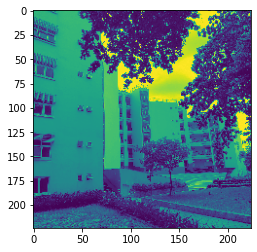

In [ ]:
plt.imshow(X[199])
print(y[199])

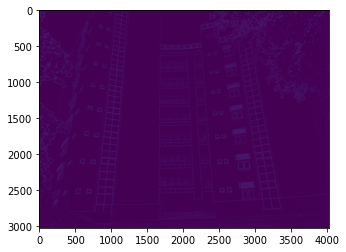

In [ ]:
img = cv2.imread('/content/dataset/B/IMG_1641.JPG')
a, hog_a = feature_extraction(img)
plt.imshow(hog_a)

In [ ]:
print(a)

[0.06926913 0.04422676 0.07812205 ... 0.02099775 0.03428439 0.03055715]


In [ ]:
df = pd.DataFrame()

In [ ]:
X_features = get_feature(X)

In [ ]:
X_features = np.asarray(X_features)
y = np.asarray(y)

In [ ]:
X_features.shape

(811, 26244)

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X_features, y, test_size=0.35, shuffle=True)

In [ ]:
from sklearn.svm import SVC
SVCClassifier = SVC()
SVCClassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVCClassifier.score(X_train, y_train)

0.9886148007590133

In [ ]:
SVCClassifier.score(X_test, y_test)

0.7605633802816901

In [ ]:
 def predict_one_image(path):
    img = cv2.imread(path, 0)
    img = cv2.resize(img, (224,224))
    img, hog_img = feature_extraction(img)
    img=img/255
    img = np.asarray(img, dtype=np.float32)
    img = img.reshape(1, img.shape[0])
    print(img.shape)
    return img

/70423937_1751188291679900_1166631263553978368_o.jpg
(1, 26244)
['B']


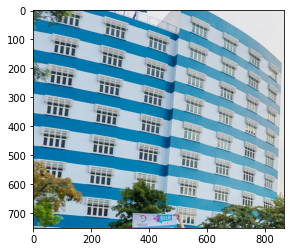

In [ ]:

path = input()
img = Image.open(path)
plt.imshow(img)
print(SVCClassifier.predict(predict_one_image(path)))
